# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

from google.colab import drive
from google.colab import files

drive.mount("/content/drive")

Mounted at /content/drive


# **Uploading Module**

In [ ]:
files.upload()

In [ ]:
import practicefunc as pf

# **Read Data**

In [ ]:
pd.set_option("display.max_columns",100)

In [ ]:
A1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H1N1 Flu Shot/training_set_features.csv")

In [ ]:
b1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H1N1 Flu Shot/training_set_labels.csv")

In [ ]:
A1.shape

(26707, 36)

In [ ]:
b1.shape

(26707, 3)

In [ ]:
a1=pd.merge(left=A1,right=b1,how="outer",left_on="respondent_id",right_on="respondent_id")

In [ ]:
a1.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0


# **Age Group and Poverty**

In [ ]:
a1["income_poverty"].replace("<= $75,000, Above Poverty","Above Poverty",inplace=True)

In [ ]:
grp=a1[["respondent_id","age_group"]]
grp

,respondent_id,age_group
0,0,55 - 64 Years
1,1,35 - 44 Years
2,2,18 - 34 Years
3,3,65+ Years
4,4,45 - 54 Years
...,...,...
26702,26702,65+ Years
26703,26703,18 - 34 Years
26704,26704,55 - 64 Years
26705,26705,18 - 34 Years


In [ ]:
grp1=grp[grp["age_group"]=="65+ Years"]
grp2=grp[grp["age_group"]!="65+ Years"]

In [ ]:
b51=[]
b52=[]
for i in grp2.age_group:
  x=i.split("-")[0]
  y=i.split("-")[1]
  b51.append(x)
  b52.append(y)

b521=[]
for i in b52:
  x=i.split(" ")[1]
  b521.append(x)

DFb5=pd.DataFrame(grp2[["respondent_id"]],columns=["respondent_id"])

DFb5["LowerLimit"]=b51
DFb5["UpperLimit"]=b521

DFb5["LowerLimit"]=DFb5["LowerLimit"].astype(int)
DFb5["UpperLimit"]=DFb5["UpperLimit"].astype(int)

DFb5["Avg_age"]=(DFb5["LowerLimit"]+DFb5["UpperLimit"])/2
DFb5.drop(labels=["LowerLimit","UpperLimit"],axis=1,inplace=True)
DFb5

,respondent_id,Avg_age
0,0,59.5
1,1,39.5
2,2,26.0
4,4,49.5
6,6,59.5
...,...,...
26700,26700,59.5
26701,26701,26.0
26703,26703,26.0
26704,26704,59.5


In [ ]:
s5=[]
for i in grp1.age_group:
  x=i.split("+")[0]
  s5.append(x)

DFs5=pd.DataFrame(grp1[["respondent_id"]],columns=["respondent_id"])

DFs5["Avg_age"]=s5
DFs5["Avg_age"]=DFs5["Avg_age"].astype(int)
DFs5

,respondent_id,Avg_age
3,3,65
5,5,65
12,12,65
16,16,65
18,18,65
...,...,...
26685,26685,65
26687,26687,65
26697,26697,65
26702,26702,65


In [ ]:
DF=pd.concat([DFb5,DFs5])

In [ ]:
AVG_AGE=DF.sort_values(by='respondent_id')
AVG_AGE

,respondent_id,Avg_age
0,0,59.5
1,1,39.5
2,2,26.0
3,3,65.0
4,4,49.5
...,...,...
26702,26702,65.0
26703,26703,26.0
26704,26704,59.5
26705,26705,26.0


In [ ]:
a2=pd.merge(left=a1,right=AVG_AGE,how="outer",left_on="respondent_id",right_on="respondent_id")

In [ ]:
a2.drop(labels=["age_group"],axis=1,inplace=True)

In [ ]:
a2

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,Avg_age
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,59.5
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1,39.5
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,College Graduate,White,Male,Above Poverty,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,26.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,65.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,Some College,White,Female,Above Poverty,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,Some College,White,Female,Above Poverty,Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,65.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,College Graduate,White,Male,Above Poverty,Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0,26.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1,59.5
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,Some College,Hispanic,Female,Above Poverty,Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0,26.0


# **Missing Data Treatment**

In [ ]:
a2.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [ ]:
pf.replacer(a2)

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

# **Outlier Analysis**

In [ ]:
pf.outlier_analysis(a2)

,OUT_VAL
respondent_id,0.000000
h1n1_vaccine,0.000000
household_children,0.000000
household_adults,0.000000
opinion_seas_sick_from_vacc,0.000000
opinion_seas_risk,0.000000
opinion_seas_vacc_effective,0.000000
opinion_h1n1_sick_from_vacc,0.000000
opinion_h1n1_risk,0.000000
opinion_h1n1_vacc_effective,0.000000


Features with Outliers: 

behavioral_antiviral_meds

behavioral_face_mask

child_under_6_months

In [ ]:
a=pf.outliers_rem(a2)

___________________________________________
Features with Outliers:  ['behavioral_antiviral_meds', 'behavioral_face_mask', 'child_under_6_months']
___________________________________________


In [ ]:
a2.shape

(26707, 38)

In [ ]:
a.shape

(22050, 38)

# **Univariate Analysis**

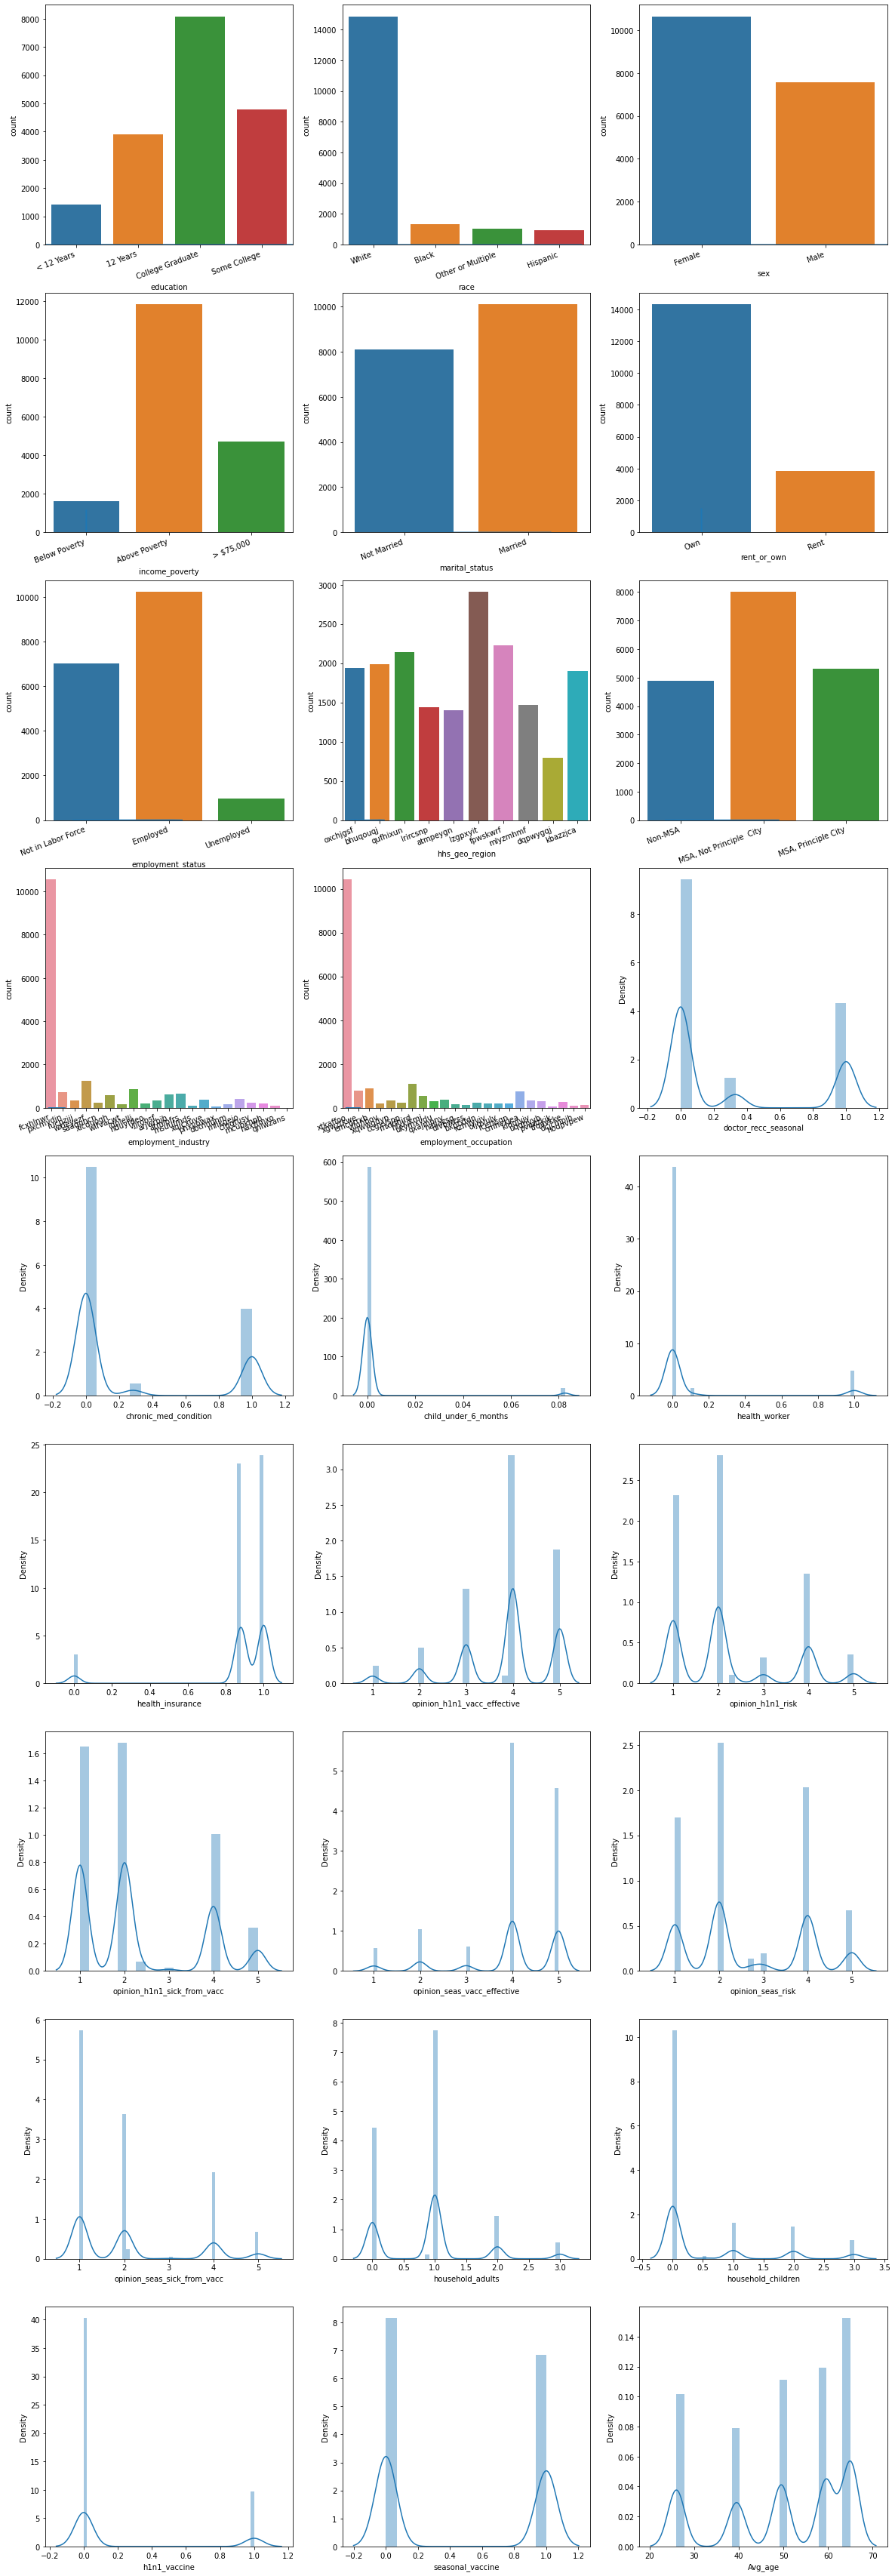

In [ ]:
pf.UNI(a,(20,90))

# **Heatmap**

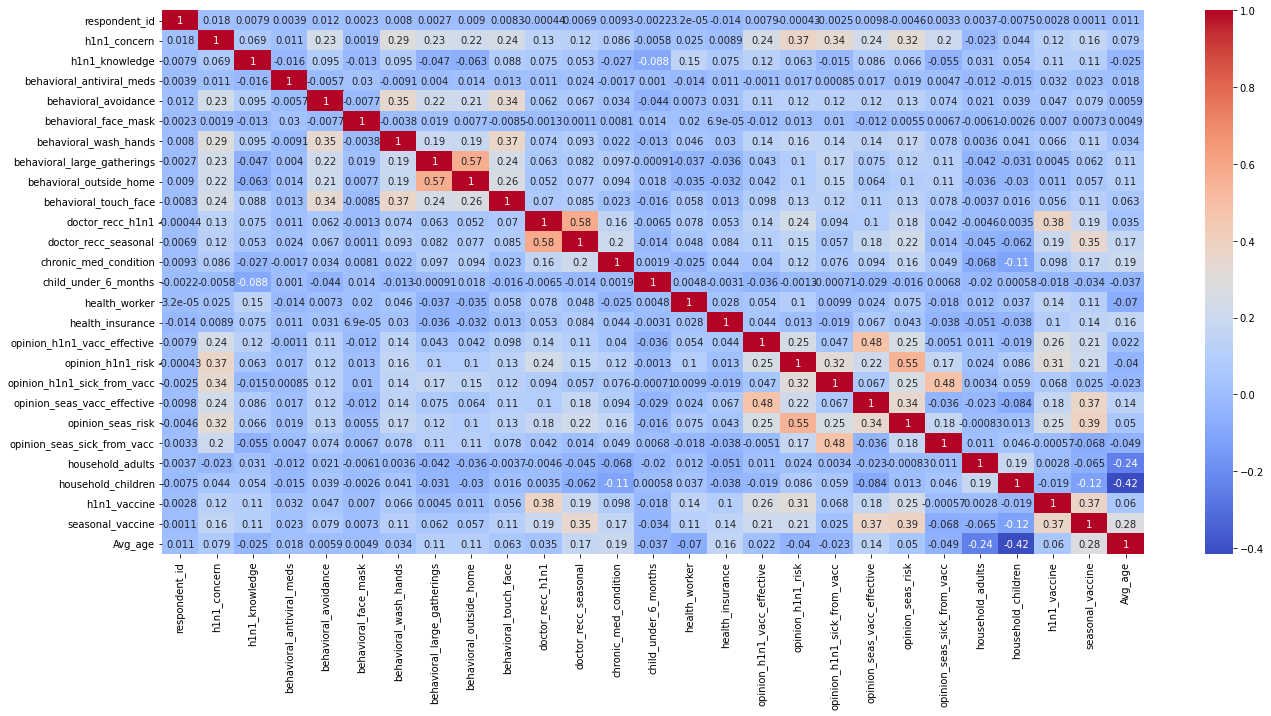

In [ ]:
pf.HM(a,(22,10))

# **Anova**

In [ ]:
pf.ANOVA_INcat(a,"h1n1_vaccine")

---------------- h1n1_vaccine vs respondent_id ------------------
0.6806254356753527
____________________________________________________
---------------- h1n1_vaccine vs h1n1_concern ------------------
5.342315397817139e-66
____________________________________________________
---------------- h1n1_vaccine vs h1n1_knowledge ------------------
1.134914220765726e-55
____________________________________________________
---------------- h1n1_vaccine vs behavioral_antiviral_meds ------------------
1.6825545192642362e-06
____________________________________________________
---------------- h1n1_vaccine vs behavioral_avoidance ------------------
4.796684135560065e-12
____________________________________________________
---------------- h1n1_vaccine vs behavioral_face_mask ------------------
0.29853332311138964
____________________________________________________
---------------- h1n1_vaccine vs behavioral_wash_hands ------------------
7.318064765300665e-23
____________________________________

In [ ]:
pf.ANOVA_cat(a,"h1n1_vaccine")

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_wash_hands',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'household_children',
 'h1n1_vaccine',
 'seasonal_vaccine',
 'Avg_age']

In [ ]:
imp_con=['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_wash_hands',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'household_children',
 'seasonal_vaccine',
 'Avg_age']

# **Chi Square Test**

In [ ]:
pf.CHI_an(a,"h1n1_vaccine")

---------------- h1n1_vaccine vs education ------------------
0.03675399511559767
____________________________________________________
---------------- h1n1_vaccine vs race ------------------
0.6935676618689357
____________________________________________________
---------------- h1n1_vaccine vs sex ------------------
0.13696008778679256
____________________________________________________
---------------- h1n1_vaccine vs income_poverty ------------------
0.5896516366747432
____________________________________________________
---------------- h1n1_vaccine vs marital_status ------------------
0.3094385796783537
____________________________________________________
---------------- h1n1_vaccine vs rent_or_own ------------------
0.2715464527214376
____________________________________________________
---------------- h1n1_vaccine vs employment_status ------------------
0.529351298764448
____________________________________________________
---------------- h1n1_vaccine vs hhs_geo_region ----

In [ ]:
pf.CHI(a,"h1n1_vaccine")

[]

**Even if our function says that the categorical features are not important as humans we know that some features play a vital role in prediction thus we will consider categorical features.**

In [ ]:
imp_cat=["education","race","sex","income_poverty","census_msa","rent_or_own","marital_status"]

# **Defining X and Y**

In [ ]:
X=a[imp_con+imp_cat]

In [ ]:
Y=a["h1n1_vaccine"]

# **Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X1=pd.DataFrame(ss.fit_transform(X[imp_con]),columns=imp_con)
X2=pd.get_dummies(X[imp_cat])

Xnew=X1.join(X2)

In [ ]:
Xnew.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,household_children,seasonal_vaccine,Avg_age,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_> $75,000",income_poverty_Above Poverty,income_poverty_Below Poverty,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,rent_or_own_Own,rent_or_own_Rent,marital_status_Married,marital_status_Not Married
0,-0.622300,-2.050689,-0.051797,-1.585041,-2.057583,0.726381,-0.524109,-0.709042,-0.628697,-0.177569,-0.33742,0.500324,-0.836398,-1.023908,-0.220518,-1.864341,-1.222968,-0.553591,-0.916741,0.661950,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1
1,1.616814,1.221694,-0.051797,0.636098,0.486767,0.726381,-0.524109,-0.709042,-0.628697,-0.177569,-0.33742,0.500324,1.169048,1.435967,1.301819,-0.010835,-0.479011,-0.553591,1.090821,-0.754449,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1


# **ANN Model**

In [ ]:
pip install keras


In [ ]:
pip install tensorflow

In [ ]:
from keras import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
pip install keras-tuner

In [ ]:
import keras_tuner as kt

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [ ]:
def model_builder(hp):
  nn=Sequential()
  x=hp.Int("units1",min_value=36,max_value=516,step=12)
  nn.add(Dense(units=x,input_dim=xtrain.shape[1]))

  y1=hp.Int("units2",min_value=36,max_value=516,step=12)
  nn.add(Dense(units=y1,activation="relu"))
  z1=hp.Choice("rate1",values=[0.1,0.2,0.3,0.4])
  nn.add(Dropout(rate=z1))

  y2=hp.Int("units3",min_value=36,max_value=516,step=12)
  nn.add(Dense(units=y2,activation="relu"))
  z2=hp.Choice("rate2",values=[0.1,0.2,0.3,0.4])
  nn.add(Dropout(rate=z2))

  learning_rate=hp.Float("lr",min_value=1e-4,max_value=1e-2,sampling="log")
  opt=Adam(learning_rate=learning_rate)

  nn.add(Dense(1,activation="sigmoid"))
  nn.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
  return nn

In [ ]:
tuner=kt.Hyperband(model_builder,objective="val_accuracy",max_epochs=10,project_name="h1n1_vac1")

In [ ]:
tuner.search(xtrain,ytrain,epochs=150,validation_split=0.1)

Trial 30 Complete [00h 00m 30s]
val_accuracy: 0.8866212964057922

Best val_accuracy So Far: 0.8866212964057922
Total elapsed time: 00h 08m 37s


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./h1n1_vac1
Showing 1 best trials
Trial summary
Hyperparameters:
units1: 468
units2: 288
rate1: 0.1
units3: 216
rate2: 0.4
lr: 0.0006136859621664237
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8866212964057922


In [ ]:
nn=Sequential()

nn.add(Dense(units=468,input_dim=xtrain.shape[1]))

nn.add(Dense(units=288,activation="relu"))
nn.add(Dropout(rate=0.1))

nn.add(Dense(units=216,activation="relu"))
nn.add(Dropout(rate=0.4))

learning_rate=0.0006136859621664237
opt=Adam(learning_rate=learning_rate)

nn.add(Dense(1,activation="sigmoid"))
nn.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es=EarlyStopping(patience=11,monitor="val_accuracy")

In [ ]:
model=nn.fit(Xnew,Y,validation_split=0.2,epochs=150)

Epoch 1/150
552/552 [==============================] - 5s 9ms/step - loss: 0.2432 - accuracy: 0.9011 - val_loss: 0.3776 - val_accuracy: 0.8630
Epoch 2/150
552/552 [==============================] - 3s 6ms/step - loss: 0.2377 - accuracy: 0.9029 - val_loss: 0.3633 - val_accuracy: 0.8649
Epoch 3/150
552/552 [==============================] - 3s 6ms/step - loss: 0.2274 - accuracy: 0.9055 - val_loss: 0.3816 - val_accuracy: 0.8603
Epoch 4/150
552/552 [==============================] - 3s 6ms/step - loss: 0.2236 - accuracy: 0.9073 - val_loss: 0.3995 - val_accuracy: 0.8528
Epoch 5/150
552/552 [==============================] - 3s 6ms/step - loss: 0.2179 - accuracy: 0.9087 - val_loss: 0.4203 - val_accuracy: 0.8571
Epoch 6/150
552/552 [==============================] - 3s 6ms/step - loss: 0.2117 - accuracy: 0.9107 - val_loss: 0.4185 - val_accuracy: 0.8599
Epoch 7/150
552/552 [==============================] - 3s 6ms/step - loss: 0.2036 - accuracy: 0.9148 - val_loss: 0.4208 - val_accuracy: 0.8592

In [ ]:
acc=model.history["accuracy"]
val_acc=model.history["val_accuracy"]

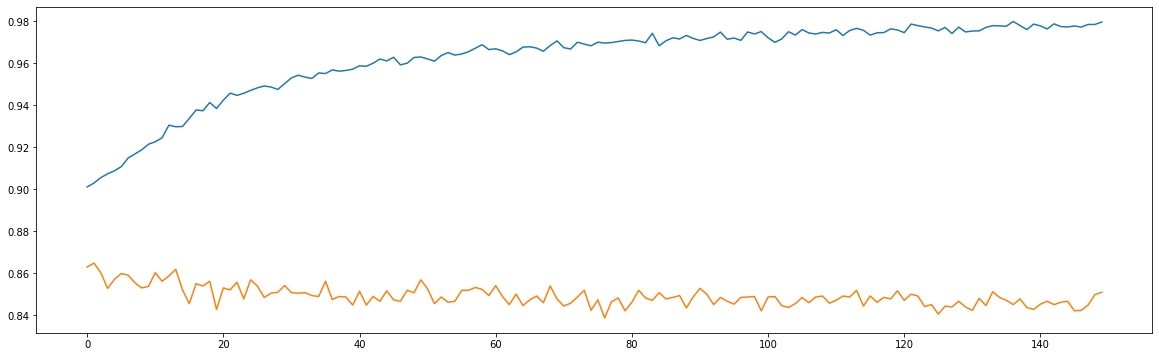

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(acc)
plt.plot(val_acc)

# **Preparing Data for Prediction**

In [ ]:
B=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H1N1 Flu Shot/test_set_features.csv")

In [ ]:
B["income_poverty"].replace("<= $75,000, Above Poverty","Above Poverty",inplace=True)
grp=B[["respondent_id","age_group"]]
grp
grp1=grp[grp["age_group"]=="65+ Years"]
grp2=grp[grp["age_group"]!="65+ Years"]

b51=[]
b52=[]
for i in grp2.age_group:
  x=i.split("-")[0]
  y=i.split("-")[1]
  b51.append(x)
  b52.append(y)

b521=[]
for i in b52:
  x=i.split(" ")[1]
  b521.append(x)

DFb5=pd.DataFrame(grp2[["respondent_id"]],columns=["respondent_id"])

DFb5["LowerLimit"]=b51
DFb5["UpperLimit"]=b521

DFb5["LowerLimit"]=DFb5["LowerLimit"].astype(int)
DFb5["UpperLimit"]=DFb5["UpperLimit"].astype(int)

DFb5["Avg_age"]=(DFb5["LowerLimit"]+DFb5["UpperLimit"])/2
DFb5.drop(labels=["LowerLimit","UpperLimit"],axis=1,inplace=True)
DFb5

s5=[]
for i in grp1.age_group:
  x=i.split("+")[0]
  s5.append(x)

DFs5=pd.DataFrame(grp1[["respondent_id"]],columns=["respondent_id"])

DFs5["Avg_age"]=s5
DFs5["Avg_age"]=DFs5["Avg_age"].astype(int)
DFs5

DF=pd.concat([DFb5,DFs5])

AVG_AGE=DF.sort_values(by='respondent_id')
AVG_AGE

B1=pd.merge(left=B,right=AVG_AGE,how="outer",left_on="respondent_id",right_on="respondent_id")

B1.drop(labels=["age_group"],axis=1,inplace=True)

In [ ]:
B1

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,Avg_age
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi,39.5
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp,26.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik,59.5
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,12 Years,White,Female,Above Poverty,Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN,65.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,12 Years,Black,Female,Above Poverty,Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,NaN,White,Female,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN,39.5
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,12 Years,White,Male,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov,26.0
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN,26.0
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2.0,3.0,4.0,4.0,3.0,2.0,Some College,White,Female,Above Poverty,Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN,59.5


In [ ]:
pf.replacer(B1)

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [ ]:
B1["seasonal_vaccine"]=0

In [ ]:
Bnew=B1[imp_con+imp_cat]

In [ ]:
#Preprocessing

B1_pred=pd.DataFrame(ss.transform(Bnew[imp_con]),columns=imp_con)
B2_pred=pd.get_dummies(Bnew[imp_cat])

Bfinal=B1_pred.join(B2_pred)

In [ ]:
pred_prob=nn.predict(Bfinal)

In [ ]:
pred_prob

array([[2.5986265e-07],
       [7.5536736e-05],
       [1.1076000e-06],
       ...,
       [1.2468696e-08],
       [0.0000000e+00],
       [9.9971068e-01]], dtype=float32)

In [ ]:
Q=[]
for i in pred_prob:
  if i[0]>0.5:
    Q.append(1)
  else:
    Q.append(0)

In [ ]:
T=B[["respondent_id"]]
T["h1n1_vaccine_pred"]=Q

In [ ]:
T.to_csv("H1n1Pred.csv")